<a href="https://colab.research.google.com/github/ZiyuWang1121/Deep-machine-learning-meets-survival-analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis
1. Check and remove duplicates if exists
2. Visualization for Numerical features, Categorical features, as well as Time & Event
3. Remove features with pariwise correlation >0.8
4. Output data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_pandas import DataFrameMapper
import seaborn as sns
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the preprocessed file
brca = pd.read_csv('/content/drive/My Drive/3799/brca.csv')

In [4]:
y = brca.iloc[:,:2]
x = brca.iloc[:,2:]

In [5]:
brca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Columns: 20315 entries, status to initial_pathologic_diagnosis_method=tumor resection
dtypes: float64(20314), int64(1)
memory usage: 169.3 MB


In [6]:
# summary statistics
brca.describe()

,status,time,age,number_of_lymph_nodes,lymph_node_examined_count,number_of_lymphnodes_positive_by_he,tumor_necrosis_percent,tumor_nuclei_percent,tumor_weight,A1BG,...,breast_carcinoma_surgical_procedure_name=modified radical mastectomy,breast_carcinoma_surgical_procedure_name=other,breast_carcinoma_surgical_procedure_name=simple mastectomy,history_of_neoadjuvant_treatment=yes,initial_pathologic_diagnosis_method=cytology (e.g. peritoneal or pleural fluid),initial_pathologic_diagnosis_method=excisional biopsy,initial_pathologic_diagnosis_method=fine needle aspiration biopsy,initial_pathologic_diagnosis_method=incisional biopsy,"initial_pathologic_diagnosis_method=other method, specify:",initial_pathologic_diagnosis_method=tumor resection
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,...,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,0.138278,1245.436813,0.509459,0.067625,0.241907,0.067625,0.205331,0.720914,0.114347,0.067987,...,0.345238,0.248168,0.181319,0.011905,0.019231,0.026557,0.087912,0.014652,0.060440,0.148352
std,0.345350,1191.317312,0.204320,0.122075,0.187302,0.122075,0.330215,0.133798,0.128940,0.073290,...,0.475664,0.432148,0.385459,0.108507,0.137398,0.160858,0.283297,0.120211,0.238409,0.355611
min,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,450.750000,0.359375,0.000000,0.068182,0.000000,0.000000,0.625000,0.052974,0.029200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,843.000000,0.509459,0.028571,0.227273,0.028571,0.000000,0.687500,0.067421,0.049280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1682.250000,0.640625,0.067625,0.340909,0.067625,0.300000,0.812500,0.124704,0.080774,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8605.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
features = np.setdiff1d(brca.columns, ['status', 'time']).tolist()

In [8]:
# Checking for null values
N_null = sum(brca[features].isnull().sum())
print("The brca contains {} null values".format(N_null)) #0 null values

# Removing duplicates if there exist
N_dupli = sum(brca.duplicated(keep='first'))
brca = brca.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = brca.shape[0]

The brca contains 0 null values
The dataset contains 0 duplicates


In [9]:
categorical_start = brca.columns.get_loc('pathologic_stage=stage ia')

In [10]:
# define numerical and categorical features
num = brca.iloc[:,2:categorical_start]
cat = brca.iloc[:,categorical_start:]

In [11]:
cat_cols = cat.columns
num_cols = num.columns

### Numerical features

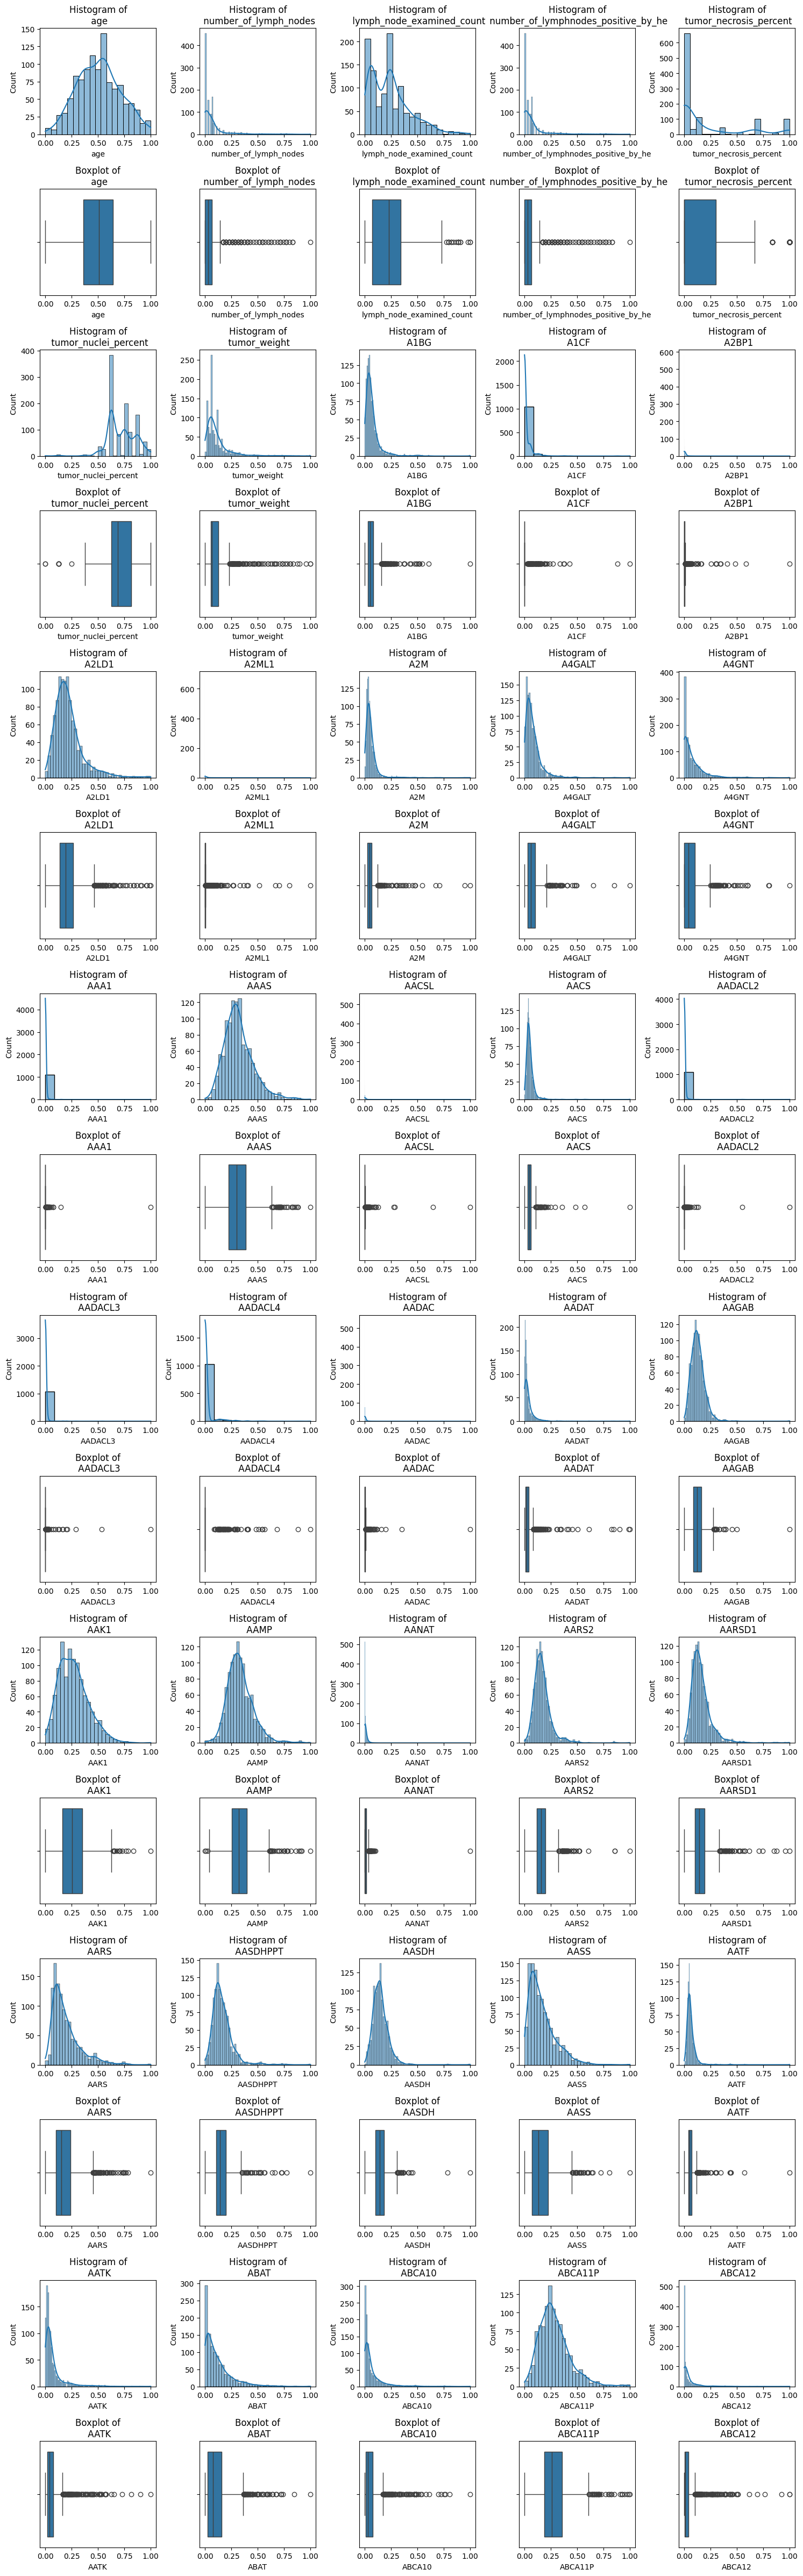

In [ ]:
# Define the number of columns for plots in one row
num_plots = 5

# Plot the first 40 features as example
data = num.iloc[:, :40]  #

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(data.shape[1] / num_plots) * 2

# Create subplots with specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_plots, figsize=(15, num_rows * 3))

for i, col in enumerate(data.columns):
    row = (i // num_plots) * 2
    col_index = i % num_plots
    sns.histplot(data[col], kde=True, ax=axs[row, col_index])
    sns.boxplot(x=data[col], ax=axs[row + 1, col_index])
    axs[row, col_index].set_title(f'Histogram of\n {col}')
    axs[row + 1, col_index].set_title(f'Boxplot of\n {col}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Categorical features

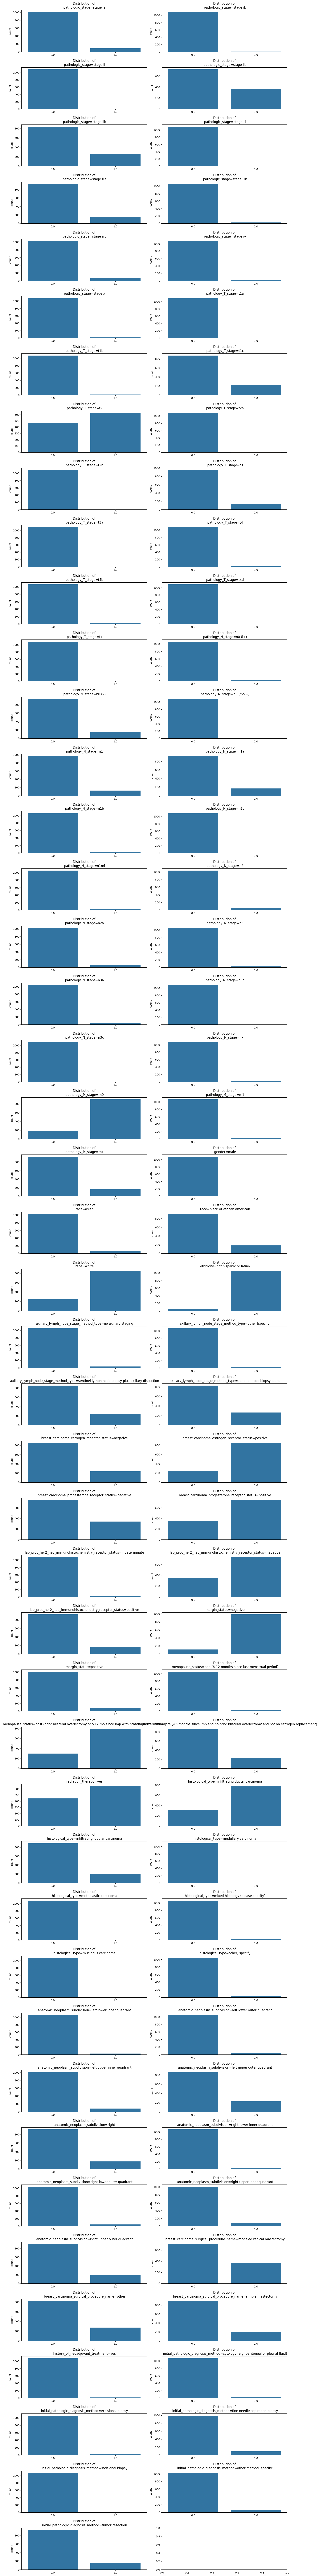

In [ ]:
num_plots = 2  # Number of plots in 1 row

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(len(cat_cols) / num_plots)

fig, axs = plt.subplots(num_rows, num_plots, figsize=(15, num_rows*3))

for i, col in enumerate(cat_cols):
    row = i // num_plots
    col = i % num_plots

    # Count plot
    sns.countplot(x=cat_cols[i], data=cat, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of\n {cat_cols[i]}')

    # Remove x label
    axs[row, col].set_xlabel('')

plt.tight_layout()
plt.show()

### Time & Event

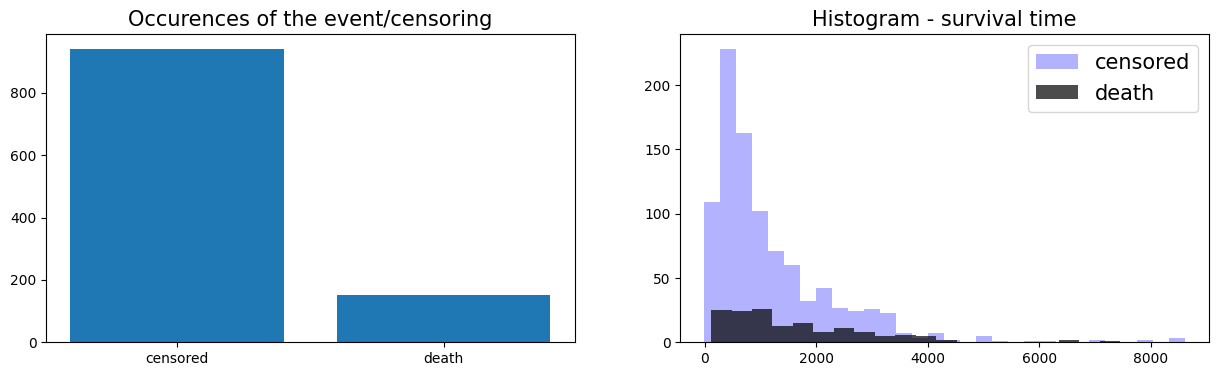

In [ ]:
from collections import Counter

# Creating an empty chart
fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

# Counting the number of occurrences for each category
data = Counter(brca['status'].replace({0:'censored', 1:'death'}))
category = list(data.keys())
counts = list(data.values())
idx = range(len(counts))

# Displaying the occurrences of the event/censoring
ax1.bar(idx, counts)
ax1.set_xticks(idx)
ax1.set_xticklabels(category)
ax1.set_title( 'Occurences of the event/censoring', fontsize=15)

# Showing the histogram of the survival times for the censoring
time_0 = brca.loc[ brca['status'] == 0, 'time']
ax2.hist(time_0, bins=30, alpha=0.3, color='blue', label = 'censored')

# Showing the histogram of the survival times for the events
time_1 = brca.loc[ brca['status'] == 1, 'time']
ax2.hist(time_1, bins=20, alpha=0.7, color='black', label = 'death')
ax2.set_title( 'Histogram - survival time', fontsize=15)

# Displaying everything side-by-side
plt.legend(fontsize=15)
plt.show()

In [ ]:
n_censored = y.shape[0] - y["status"].sum()
print("%.1f%% of records are censored" % (n_censored / y.shape[0] * 100))

86.2% of records are censored


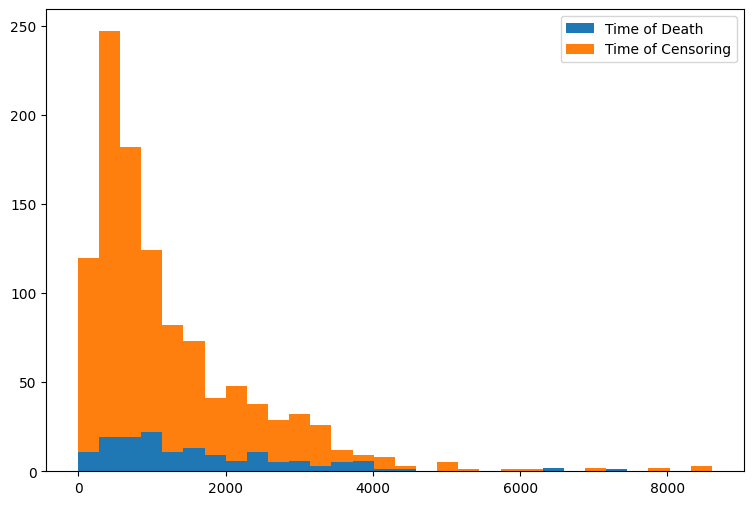

In [ ]:
plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist((y["time"][y["status"] == 1], y["time"][y["status"] != 1]), bins=30, stacked=True)
plt.legend(patches, ["Time of Death", "Time of Censoring"])

### Correlations

In [ ]:
corr = brca[features].corr()

In [ ]:
corr_rounded = corr.round(2)

In [ ]:
# Print the correlation matrix
print("Correlation Matrix:")
print(corr)

Correlation Matrix:
                            A1BG      A1CF     A2BP1     A2LD1       A2M  \
A1BG                    1.000000 -0.031691  0.011390  0.100432 -0.060641   
A1CF                   -0.031691  1.000000 -0.017170 -0.006801 -0.027971   
A2BP1                   0.011390 -0.017170  1.000000 -0.000790 -0.036923   
A2LD1                   0.100432 -0.006801 -0.000790  1.000000 -0.031335   
A2M                    -0.060641 -0.027971 -0.036923 -0.031335  1.000000   
...                          ...       ...       ...       ...       ...   
radiation_therapy=yes  -0.023759 -0.002573 -0.035436 -0.040520  0.063859   
tAKR                   -0.034798 -0.012038 -0.010762 -0.036004  0.047171   
tumor_necrosis_percent -0.103550  0.002151 -0.012009 -0.049393  0.065705   
tumor_nuclei_percent    0.024963 -0.020952 -0.018945  0.031483 -0.121068   
tumor_weight           -0.074866 -0.015197 -0.023581  0.034503  0.014392   

                           A2ML1    A4GALT     A4GNT      AAA1     

In [ ]:
# Save the DataFrame to a CSV file as it takes a long time to compute
#corr_rounded.to_csv('/content/drive/My Drive/3799/corr_rounded.csv', index=False)

In [ ]:
corr_rounded = pd.read_csv('/content/drive/My Drive/3799/corr_rounded.csv')

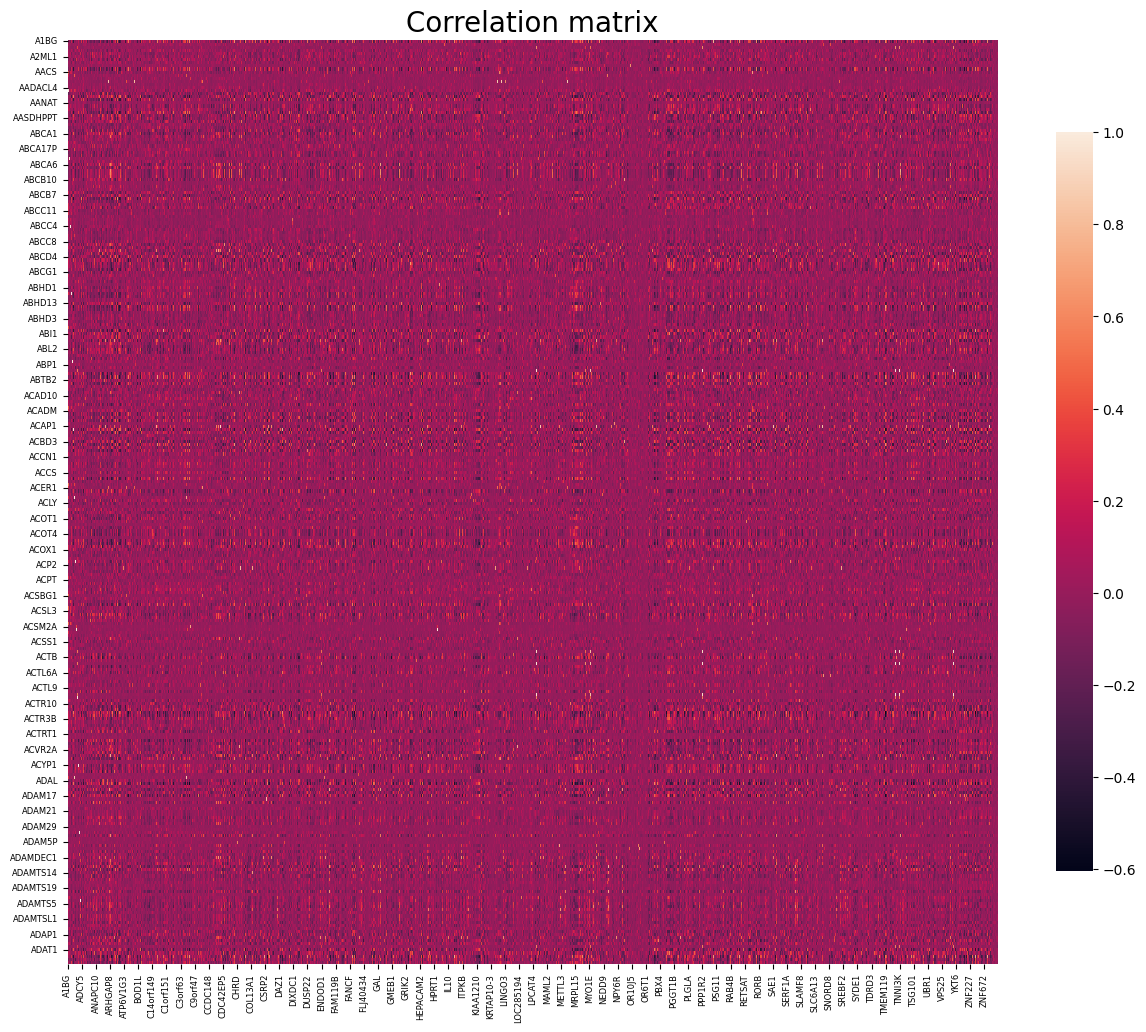

In [ ]:
# Take the first 300 features as example
plt.figure(figsize=(15, 12))
sns.heatmap(corr[:300], annot=False, fmt=".2f", cbar_kws={"shrink": .8})
plt.title("Correlation matrix", fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [ ]:
# Find highly correlated features
corr_threshold = 0.8  # Adjust the threshold as needed
highly_correlated_pairs = []

for i in range(len(corr_rounded.columns)):
    for j in range(i+1, len(corr_rounded.columns)):
        if abs(corr_rounded.iloc[i, j]) > corr_threshold:
            highly_correlated_pairs.append((corr_rounded.columns[i], corr_rounded.columns[j]))

In [ ]:
highly_correlated_pairs

[('AADAC', 'OR11H4'),
 ('AADACL2', 'ARG1'),
 ('AADACL2', 'ASPRV1'),
 ('AADACL2', 'BEST2'),
 ('AADACL2', 'BPIL2'),
 ('AADACL2', 'C1orf68'),
 ('AADACL2', 'CCL27'),
 ('AADACL2', 'FLG'),
 ('AADACL2', 'FLG2'),
 ('AADACL2', 'IL1F10'),
 ('AADACL2', 'KCNK7'),
 ('AADACL2', 'KPRP'),
 ('AADACL2', 'KRT1'),
 ('AADACL2', 'KRT10'),
 ('AADACL2', 'KRT2'),
 ('AADACL2', 'KRTDAP'),
 ('AADACL2', 'LCE1A'),
 ('AADACL2', 'LCE1B'),
 ('AADACL2', 'LCE1C'),
 ('AADACL2', 'LCE1D'),
 ('AADACL2', 'LCE1E'),
 ('AADACL2', 'LCE1F'),
 ('AADACL2', 'LCE2A'),
 ('AADACL2', 'LCE2B'),
 ('AADACL2', 'LCE2C'),
 ('AADACL2', 'LCE2D'),
 ('AADACL2', 'LCE4A'),
 ('AADACL2', 'LCE5A'),
 ('AADACL2', 'LCE6A'),
 ('AADACL2', 'LGALS7'),
 ('AADACL2', 'LIPM'),
 ('AADACL2', 'LOR'),
 ('AADACL2', 'MLANA'),
 ('AADACL2', 'NKPD1'),
 ('AADACL2', 'PHYHIP'),
 ('AADACL2', 'RDH12'),
 ('AADACL2', 'SMAD5OS'),
 ('AADACL2', 'TYR'),
 ('AADACL2', 'WFDC5'),
 ('AANAT', 'CDK5R2'),
 ('ABCA6', 'ABCA8'),
 ('ABCA6', 'ABCA9'),
 ('ABCA8', 'ABCA9'),
 ('ABCA8', 'CHRDL1'),


In [ ]:
# Remove one feature from each highly correlated pair
features_to_remove = set()
for pair in highly_correlated_pairs:
    feature1, feature2 = pair
    if feature1 not in features_to_remove:
        features_to_remove.add(feature2)

# Remove highly correlated features from the dataset
brca_filtered = brca.drop(columns=features_to_remove)

print("\nRemoved Features:")
print(features_to_remove)


Removed Features:
{'PRAMEF9', 'NDUFB10', 'SLITRK2', 'LYPLA2P1', 'MNDA', 'RSPH9', 'TMEM90B', 'PPY', 'GPR174', 'C14orf180', 'ZNF225', 'OR5B3', 'HLA-F', 'SLAMF8', 'ST7OT3', 'CD2', 'PPP1R3A', 'CD177', 'PRAMEF20', 'KCTD21', 'ZNF787', 'KRTAP27-1', 'TEX11', 'MBL2', 'OR2AE1', 'NCRNA00230B', 'PLVAP', 'ZNF688', 'FLJ43950', 'DGAT2', 'MYOM1', 'SPOCK3', 'OIP5', 'FOXD4L1', 'SLC26A7', 'HLA-DMA', 'WDFY4', 'PLA2G2A', 'CCDC37', 'DUS2L', 'OR8U1', 'ADIPOQ', 'LRRC15', 'TSPY4', 'TIE1', 'TRMT2A', 'PRELID1', 'LRRC57', 'SCAND1', 'LOC400891', 'UBE2N', 'NUDT22', 'PDIA3P', 'CYP8B1', 'MPG', 'RPRD1B', 'SCML4', 'IKZF1', 'C17orf90', 'FADD', 'FAM26E', 'TMOD4', 'ST6GAL2', 'FAM19A1', 'TIFAB', 'FAM83C', 'KRT75', 'PROK1', 'VPS72', 'FAP', 'POP4', 'POTEA', 'C11orf66', 'UNC13A', 'OR6C4', 'number_of_lymphnodes_positive_by_he', 'ZBTB37', 'HMHA1', 'TNFRSF1B', 'LAT', 'CLVS2', 'UBR2', 'VCX3A', 'USP9X', 'ATP1B4', 'SIPA1L2', 'UXT', 'RFNG', 'SELL', 'TRIM58', 'ECM2', 'ST18', 'PMCHL1', 'CLEC10A', 'FLYWCH2', 'DPEP3', 'RDH12', 'LCE3D',

In [ ]:
features_to_remove

{'PRAMEF9',
 'NDUFB10',
 'SLITRK2',
 'LYPLA2P1',
 'MNDA',
 'RSPH9',
 'TMEM90B',
 'PPY',
 'GPR174',
 'C14orf180',
 'ZNF225',
 'OR5B3',
 'HLA-F',
 'SLAMF8',
 'ST7OT3',
 'CD2',
 'PPP1R3A',
 'CD177',
 'PRAMEF20',
 'KCTD21',
 'ZNF787',
 'KRTAP27-1',
 'TEX11',
 'MBL2',
 'OR2AE1',
 'NCRNA00230B',
 'PLVAP',
 'ZNF688',
 'FLJ43950',
 'DGAT2',
 'MYOM1',
 'SPOCK3',
 'OIP5',
 'FOXD4L1',
 'SLC26A7',
 'HLA-DMA',
 'WDFY4',
 'PLA2G2A',
 'CCDC37',
 'DUS2L',
 'OR8U1',
 'ADIPOQ',
 'LRRC15',
 'TSPY4',
 'TIE1',
 'TRMT2A',
 'PRELID1',
 'LRRC57',
 'SCAND1',
 'LOC400891',
 'UBE2N',
 'NUDT22',
 'PDIA3P',
 'CYP8B1',
 'MPG',
 'RPRD1B',
 'SCML4',
 'IKZF1',
 'C17orf90',
 'FADD',
 'FAM26E',
 'TMOD4',
 'ST6GAL2',
 'FAM19A1',
 'TIFAB',
 'FAM83C',
 'KRT75',
 'PROK1',
 'VPS72',
 'FAP',
 'POP4',
 'POTEA',
 'C11orf66',
 'UNC13A',
 'OR6C4',
 'number_of_lymphnodes_positive_by_he',
 'ZBTB37',
 'HMHA1',
 'TNFRSF1B',
 'LAT',
 'CLVS2',
 'UBR2',
 'VCX3A',
 'USP9X',
 'ATP1B4',
 'SIPA1L2',
 'UXT',
 'RFNG',
 'SELL',
 'TRIM58',
 'EC

In [ ]:
print(brca.shape)
print(brca_filtered.shape)

(1092, 20315)
(1092, 18366)


In [ ]:
# Save the DataFrame to a CSV file
brca_filtered.to_csv('/content/drive/My Drive/3799/brca_filtered.csv', index=False)